# **Importing Packages**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idm
import numpy as np
import warnings
#Supressing warnings
warnings.filterwarnings('ignore')

**2.Image Augmentation**

In [ ]:
# Creating augmentation on training variable
train_flowers=idm(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

# Passing training data to train variable
Xtrain = train_flowers.flow_from_directory('/content/drive/MyDrive/flowers',target_size=(76,76),class_mode='categorical',batch_size=100)


Found 4317 images belonging to 5 classes.


In [ ]:
# Creating augmentation on testing variable
test_flowers=idm(rescale=1./255)

# Passing testing data to test variable
Xtest = test_flowers.flow_from_directory('/content/drive/MyDrive/flowers',target_size=(76,76),class_mode='categorical',batch_size=100)


Found 4317 images belonging to 5 classes.


## **3.Create Model**

In [ ]:
Flower_model = Sequential()
Flower_model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
Flower_model.add(MaxPooling2D(pool_size=(2,2)))
Flower_model.add(Flatten())
Flower_model.add(Dense(300,activation='relu'))
Flower_model.add(Dense(150,activation='relu'))
Flower_model.add(Dense(5,activation='softmax'))

# 4. Compile the Model

In [ ]:
Flower_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# 5. Fit the Model

In [ ]:
Flower_model.fit_generator(Xtrain,steps_per_epoch= len (Xtrain),epochs= 10,validation_data=Xtest,validation_steps= len (Xtest))

Epoch 1/10
44/44 [==============================] - 928s 21s/step - loss: 1.4570 - accuracy: 0.4123 - val_loss: 1.1749 - val_accuracy: 0.5286
Epoch 2/10
44/44 [==============================] - 64s 1s/step - loss: 1.0832 - accuracy: 0.5724 - val_loss: 1.0501 - val_accuracy: 0.5974
Epoch 3/10
44/44 [==============================] - 62s 1s/step - loss: 0.9886 - accuracy: 0.6264 - val_loss: 1.0602 - val_accuracy: 0.6020
Epoch 4/10
44/44 [==============================] - 63s 1s/step - loss: 0.9595 - accuracy: 0.6247 - val_loss: 1.0191 - val_accuracy: 0.6134
Epoch 5/10
44/44 [==============================] - 63s 1s/step - loss: 0.9065 - accuracy: 0.6470 - val_loss: 0.8031 - val_accuracy: 0.7026
Epoch 6/10
44/44 [==============================] - 63s 1s/step - loss: 0.8353 - accuracy: 0.6806 - val_loss: 0.8067 - val_accuracy: 0.6996
Epoch 7/10
44/44 [==============================] - 65s 1s/step - loss: 0.8086 - accuracy: 0.6829 - val_loss: 0.9354 - val_accuracy: 0.6644
Epoch 8/10
44/44 [

# 7. Save the model

In [ ]:
Flower_model.save('Flower.h5')

# **8. Test the model**

In [ ]:
import cv2

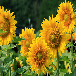

In [ ]:
from numpy.lib.type_check import imag
test_img=image.load_img('/content/drive/MyDrive/flowers/sunflower/1008566138_6927679c8a.jpg',target_size=(76,76))
test_img

In [ ]:
x=image.img_to_array(test_img)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category=['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]

'tulip'

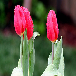

In [ ]:
test_img1=image.load_img('/content/drive/MyDrive/flowers/tulip/100930342_92e8746431_n.jpg',target_size=(76,76))
test_img1

In [ ]:
x=image.img_to_array(test_img1)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category[predicted]


'tulip'

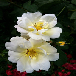

In [ ]:
test_img2=image.load_img('/content/drive/MyDrive/flowers/rose/10090824183_d02c613f10_m.jpg',target_size=(76,76))
test_img2

In [ ]:
x=image.img_to_array(test_img2)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category[predicted]

'tulip'